<a href="https://colab.research.google.com/github/Dcw2604/Targil3/blob/main/Daniel_cohen_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Dcw2604/Targil3.git


Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [2]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

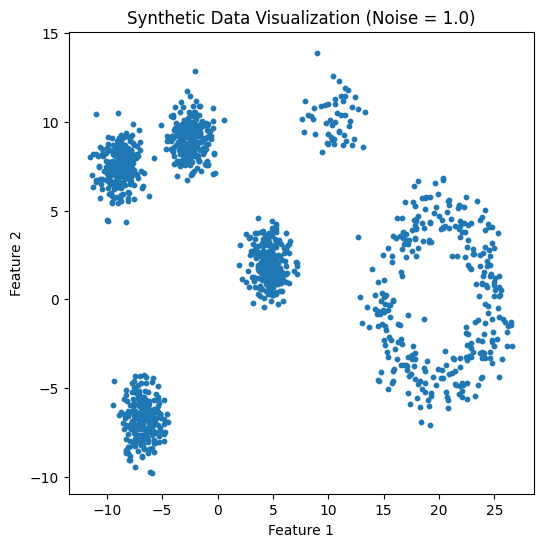

In [3]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic Data Visualization (Noise = 1.0)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # Compute Silhouette Score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Identify the best k
best_k = K_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("Silhouette scores for k in [2..10]:")
for k, s in zip(K_values, silhouette_scores):
    print(f"k = {k}, silhouette = {s:.4f}")

print(f"\nBest k: {best_k} (score = {best_score:.4f})")


Silhouette scores for k in [2..10]:
k = 2, silhouette = 0.5673
k = 3, silhouette = 0.5858
k = 4, silhouette = 0.6813
k = 5, silhouette = 0.6433
k = 6, silhouette = 0.6606
k = 7, silhouette = 0.7026
k = 8, silhouette = 0.7163
k = 9, silhouette = 0.7118
k = 10, silhouette = 0.7105

Best k: 8 (score = 0.7163)


In [5]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X)
labels_final = kmeans_final.labels_


final_score = silhouette_score(X, labels_final)
print(f"Final model (k={best_k}) silhouette score:", final_score)


Final model (k=8) silhouette score: 0.716259254869025


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_values = range(2, 11)

for k in K_values:
    # Create and train AgglomerativeClustering
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage='complete',
        metric='cosine'
    )
    labels = agg.fit_predict(X)

    # Compute Silhouette Score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Identify the best k
best_k = K_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print("AgglomerativeClustering silhouette scores:")
for k, s in zip(K_values, silhouette_scores):
    print(f"  k = {k}: {s:.4f}")

print(f"\nBest k for AgglomerativeClustering: {best_k} (silhouette = {best_score:.4f})")


AgglomerativeClustering silhouette scores:
  k = 2: 0.5090
  k = 3: 0.6109
  k = 4: 0.5785
  k = 5: 0.5798
  k = 6: 0.5607
  k = 7: 0.4583
  k = 8: 0.4032
  k = 9: 0.3256
  k = 10: 0.2437

Best k for AgglomerativeClustering: 3 (silhouette = 0.6109)


In [7]:
agg_final = AgglomerativeClustering(
    n_clusters=best_k,
    linkage='complete',
    metric='cosine'
)
labels_final = agg_final.fit_predict(X)

final_score = silhouette_score(X, labels_final)
print(f"Final model (k={best_k}) silhouette score: {final_score:.4f}")


Final model (k=3) silhouette score: 0.6109


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [8]:
from sklearn.cluster import DBSCAN
eps_values = [0.1, 0.3, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

best_score = -1
best_params = (None, None)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)


        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)


        if num_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1  # Not valid or meaningful for silhouette

        results.append((eps, min_samples, num_clusters, score))

        # Track the best silhouette score so far
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

print("Grid Search Results for DBSCAN:")
for (eps, mins, n_c, s) in results:
    print(f"  eps={eps}, min_samples={mins}, #clusters={n_c}, silhouette={s:.4f}")

print(f"\nBest params = eps={best_params[0]}, min_samples={best_params[1]} with silhouette={best_score:.4f}")


Grid Search Results for DBSCAN:
  eps=0.1, min_samples=3, #clusters=59, silhouette=-0.4614
  eps=0.1, min_samples=5, #clusters=10, silhouette=-0.6773
  eps=0.1, min_samples=10, #clusters=0, silhouette=-1.0000
  eps=0.3, min_samples=3, #clusters=57, silhouette=-0.2064
  eps=0.3, min_samples=5, #clusters=14, silhouette=-0.0555
  eps=0.3, min_samples=10, #clusters=8, silhouette=-0.2071
  eps=0.5, min_samples=3, #clusters=45, silhouette=0.3488
  eps=0.5, min_samples=5, #clusters=23, silhouette=0.2887
  eps=0.5, min_samples=10, #clusters=4, silhouette=0.4491
  eps=1.0, min_samples=3, #clusters=6, silhouette=0.7135
  eps=1.0, min_samples=5, #clusters=6, silhouette=0.7070
  eps=1.0, min_samples=10, #clusters=9, silhouette=0.6190
  eps=1.5, min_samples=3, #clusters=5, silhouette=0.6894
  eps=1.5, min_samples=5, #clusters=5, silhouette=0.6894
  eps=1.5, min_samples=10, #clusters=6, silhouette=0.7223
  eps=2.0, min_samples=3, #clusters=5, silhouette=0.6133
  eps=2.0, min_samples=5, #clusters=5, 

In [9]:
best_eps, best_min_samples = best_params

dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_final = dbscan_final.fit_predict(X)

# Count the actual clusters (excluding noise, labeled as -1)
num_clusters_final = len(set(labels_final)) - (1 if -1 in labels_final else 0)

# If we have more than 1 cluster, compute silhouette
if num_clusters_final > 1:
    final_score = silhouette_score(X, labels_final)
else:
    final_score = -1

print(f"\nFinal DBSCAN model:")
print(f"  eps={best_eps}, min_samples={best_min_samples}")
print(f"  #clusters={num_clusters_final}, silhouette={final_score:.4f}")



Final DBSCAN model:
  eps=1.5, min_samples=10
  #clusters=6, silhouette=0.7223


6. Compare the results and choose the best method for the data


In [10]:

from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Example: Suppose you already have best hyperparameters identified:
best_k_kmeans = 4  # from your silhouette method for KMeans
best_k_agg = 5     # from your analysis for Agglomerative
best_eps = 1.0
best_min_samples = 5

# 1) K-Means
kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X)

# 2) Agglomerative
agg_final = AgglomerativeClustering(n_clusters=best_k_agg, linkage='ward')
labels_agg = agg_final.fit_predict(X)

# 3) DBSCAN
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan_final.fit_predict(X)

# -- Compute Internal Metrics for Each --
models = {
    "K-Means": labels_kmeans,
    "Agglomerative": labels_agg,
    "DBSCAN": labels_dbscan
}

for model_name, labels in models.items():
    n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0)

    # Check if there's at least 2 clusters for silhouette
    if n_clusters_found < 2:
        print(f"{model_name}: Only {n_clusters_found} cluster(s). Silhouette not defined.")
        sil_score = np.nan
    else:
        sil_score = silhouette_score(X, labels)

    # CH and DB indexes are defined for 2+ clusters as well
    if n_clusters_found < 2:
        ch_score = np.nan
        db_score = np.nan
    else:
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)

    print(f"\n** {model_name} **")
    print(f"  # of clusters found: {n_clusters_found}")
    print(f"  Silhouette Score:    {sil_score:.4f}" if not np.isnan(sil_score) else "  Silhouette Score:    n/a")
    print(f"  Calinski-Harabasz:   {ch_score:.4f}" if not np.isnan(ch_score) else "  Calinski-Harabasz:   n/a")
    print(f"  Davies-Bouldin:      {db_score:.4f}" if not np.isnan(db_score) else "  Davies-Bouldin:      n/a")



** K-Means **
  # of clusters found: 4
  Silhouette Score:    0.6813
  Calinski-Harabasz:   4416.0230
  Davies-Bouldin:      0.4812

** Agglomerative **
  # of clusters found: 5
  Silhouette Score:    0.6978
  Calinski-Harabasz:   4694.1950
  Davies-Bouldin:      0.4333

** DBSCAN **
  # of clusters found: 6
  Silhouette Score:    0.7070
  Calinski-Harabasz:   3185.3784
  Davies-Bouldin:      12.4894


15 experiments

In [12]:



def update_best_result(current_best, current_best_score, experiment_details, experiment_score):

    if experiment_score > current_best_score:
        return experiment_details, experiment_score
    else:
        return current_best, current_best_score

# Prepare variables to track best results per algorithm
best_kmeans = None
best_kmeans_score = -1.0

best_agg = None
best_agg_score = -1.0

best_dbscan = None
best_dbscan_score = -1.0

# Also track best overall
best_overall = None
best_overall_score = -1.0


kmeans_experiments = [
    {"n_clusters": 3, "init": "k-means++", "max_iter": 300},
    {"n_clusters": 4, "init": "random",    "max_iter": 300},
    {"n_clusters": 4, "init": "k-means++", "max_iter": 500},
    {"n_clusters": 5, "init": "random",    "max_iter": 300},
    {"n_clusters": 6, "init": "k-means++", "max_iter": 300},
]

print("========== K-MEANS EXPERIMENTS ==========\n")
for i, params in enumerate(kmeans_experiments, start=1):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        max_iter=params["max_iter"],
        random_state=42
    )
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)  # If there's >1 cluster, it's valid

    # Print info
    print(f"K-Means Experiment {i}: {params}")
    print(f"  Silhouette Score = {score:.4f}\n")

    # Build a dictionary describing this experiments details and results
    experiment_info = {
        "algorithm": "K-Means",
        "experiment_id": i,
        "params": params,
        "score": score
    }

    # Update best K-Means
    best_kmeans, best_kmeans_score = update_best_result(
        best_kmeans, best_kmeans_score,
        experiment_info, score
    )
    # Update best overall
    best_overall, best_overall_score = update_best_result(
        best_overall, best_overall_score,
        experiment_info, score
    )


agg_experiments = [
    {"n_clusters": 2, "linkage": "complete", "metric": "euclidean"},
    {"n_clusters": 3, "linkage": "ward"},  # ward => metric='euclidean' automatically
    {"n_clusters": 4, "linkage": "average", "metric": "manhattan"},
    {"n_clusters": 5, "linkage": "complete", "metric": "cosine"},
    {"n_clusters": 6, "linkage": "average", "metric": "euclidean"},
]

print("\n========== AGGLOMERATIVE EXPERIMENTS ==========\n")
for i, params in enumerate(agg_experiments, start=1):

    linkage_method = params["linkage"]

    if linkage_method == "ward":
        agg = AgglomerativeClustering(
            n_clusters=params["n_clusters"],
            linkage="ward"
        )
    else:
        agg = AgglomerativeClustering(
            n_clusters=params["n_clusters"],
            linkage=params["linkage"],
            metric=params["metric"]
        )

    labels = agg.fit_predict(X)

    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1

    # Print info
    print(f"Agglo Experiment {i}: {params}")
    print(f"  Silhouette Score = {score:.4f}\n")


    experiment_info = {
        "algorithm": "Agglomerative",
        "experiment_id": i,
        "params": params,
        "score": score
    }

    # Update best Agglomerative
    best_agg, best_agg_score = update_best_result(
        best_agg, best_agg_score,
        experiment_info, score
    )
    # Update best overall
    best_overall, best_overall_score = update_best_result(
        best_overall, best_overall_score,
        experiment_info, score
    )


dbscan_experiments = [
    {"eps": 0.3, "min_samples": 5, "metric": "euclidean"},
    {"eps": 0.5, "min_samples": 3, "metric": "euclidean"},
    {"eps": 0.8, "min_samples": 10, "metric": "euclidean"},
    {"eps": 1.0, "min_samples": 5, "metric": "manhattan"},
    {"eps": 1.5, "min_samples": 5, "metric": "cosine"},
]

print("\n========== DBSCAN EXPERIMENTS ==========\n")
for i, params in enumerate(dbscan_experiments, start=1):
    dbscan = DBSCAN(
        eps=params["eps"],
        min_samples=params["min_samples"],
        metric=params["metric"]
    )
    labels = dbscan.fit_predict(X)

    unique_labels = set(labels)
    n_clusters_found = len(unique_labels) - (1 if -1 in unique_labels else 0)
    if n_clusters_found > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1

    # Print info
    print(f"DBSCAN Experiment {i}: {params}")
    print(f"  #clusters found = {n_clusters_found}, Silhouette Score = {score:.4f}\n")


    experiment_info = {
        "algorithm": "DBSCAN",
        "experiment_id": i,
        "params": params,
        "score": score,
        "n_clusters_found": n_clusters_found
    }

    # Update best DBSCAN
    best_dbscan, best_dbscan_score = update_best_result(
        best_dbscan, best_dbscan_score,
        experiment_info, score
    )
    # Update best overall
    best_overall, best_overall_score = update_best_result(
        best_overall, best_overall_score,
        experiment_info, score
    )





print("\n==================== SUMMARY ====================")

print("\nBest K-Means experiment:")
if best_kmeans:
    print(f"  ID: {best_kmeans['experiment_id']}, params: {best_kmeans['params']}, score={best_kmeans['score']:.4f}")
else:
    print("  None found.")

print("\nBest Agglomerative experiment:")
if best_agg:
    print(f"  ID: {best_agg['experiment_id']}, params: {best_agg['params']}, score={best_agg['score']:.4f}")
else:
    print("  None found.")

print("\nBest DBSCAN experiment:")
if best_dbscan:
    print(f"  ID: {best_dbscan['experiment_id']}, params: {best_dbscan['params']}, score={best_dbscan['score']:.4f}")
else:
    print("  None found.")

print("\nBest overall experiment across all algorithms:")
if best_overall:
    print(f"  Algorithm: {best_overall['algorithm']}, ID: {best_overall['experiment_id']}")
    print(f"  Params: {best_overall['params']}")
    print(f"  Score: {best_overall['score']:.4f}")
else:
    print("  None found.")


========== K-MEANS EXPERIMENTS ==========

K-Means Experiment 1: {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 300}
  Silhouette Score = 0.5858

K-Means Experiment 2: {'n_clusters': 4, 'init': 'random', 'max_iter': 300}
  Silhouette Score = 0.6813

K-Means Experiment 3: {'n_clusters': 4, 'init': 'k-means++', 'max_iter': 500}
  Silhouette Score = 0.6813

K-Means Experiment 4: {'n_clusters': 5, 'init': 'random', 'max_iter': 300}
  Silhouette Score = 0.6976

K-Means Experiment 5: {'n_clusters': 6, 'init': 'k-means++', 'max_iter': 300}
  Silhouette Score = 0.6606


========== AGGLOMERATIVE EXPERIMENTS ==========

Agglo Experiment 1: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'euclidean'}
  Silhouette Score = 0.5090

Agglo Experiment 2: {'n_clusters': 3, 'linkage': 'ward'}
  Silhouette Score = 0.5806

Agglo Experiment 3: {'n_clusters': 4, 'linkage': 'average', 'metric': 'manhattan'}
  Silhouette Score = 0.6813

Agglo Experiment 4: {'n_clusters': 5, 'linkage': 'complete', 'metri